# Exploratory Data Analysis (EDA)

**Definition: An approach to analyzing data sets to summarize their main characteristics, often with visual methods.**

Purpose: To uncover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

**Techniques:**

**Univariate Analysis:** Focuses on a single variable.

**Bivariate Analysis:** Focuses on relationships between two variables.

**Multivariate Analysis:** Focuses on relationships between three or more variables.

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Understand the Data Structure

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [24]:
titanic.shape

(891, 12)

In [7]:
titanic.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9,E44,S


Inspect the Data Types and Structure

In [8]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Summarize the Data

In [11]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [14]:
titanic.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

Check for Missing Values

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
titanic.duplicated().sum()

0

In [19]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Univariate Analysis

Definition: Analysis of a single variable.(Column)

Purpose: To describe and summarize the distribution of that variable.

Techniques:

Descriptive Statistics: Mean, median, mode, standard deviation, range, variance, etc.

Visualization: Histograms, bar charts, box plots, frequency distributions, density plots.

Example: Examining the distribution of heights of individuals in a dataset.

In [26]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
catogorical_Variable = [column for column in titanic.columns if titanic[column].dtype == 'O']
numerical_Variable = [column for column in titanic.columns if titanic[column].dtype != 'O']

In [74]:
titanic[numerical_Variable]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


Categorical Column

In [48]:
sns.countplot(titanic['Embarked'])

ValueError: could not convert string to float: 'S'

In [50]:
#Fill the missing Value and remove the error

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [49]:
titanic['Embarked'].isnull().sum()

0

c:\Users\Ashwin Kumar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Embarked', ylabel='count'>

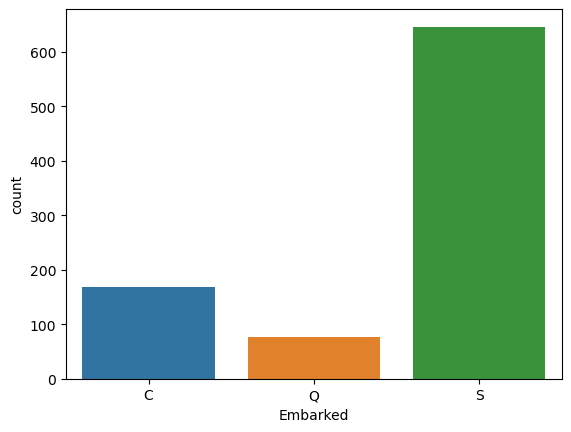

In [65]:
#This works because it follows the expected parameter usage.
sns.countplot(x='Embarked', data=titanic)


<Axes: xlabel='Sex', ylabel='count'>

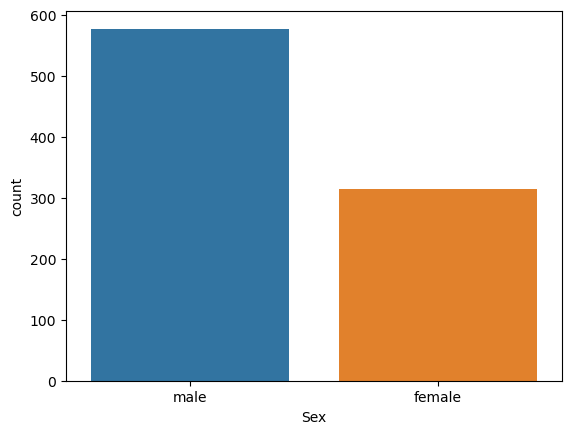

In [67]:
sns.countplot(x='Sex', data=titanic)

Pie chart

<Axes: ylabel='count'>

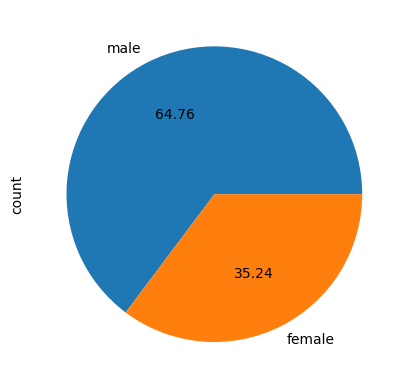

In [72]:
titanic['Sex'].value_counts().plot(kind='pie', autopct= '%.2f')

<Axes: ylabel='count'>

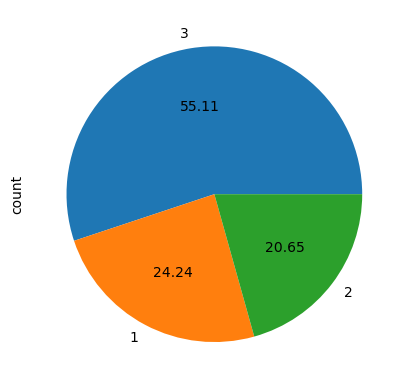

In [75]:
titanic['Pclass'].value_counts().plot(kind='pie', autopct= '%.2f')


Numrical Columns

HISTOGRAM

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

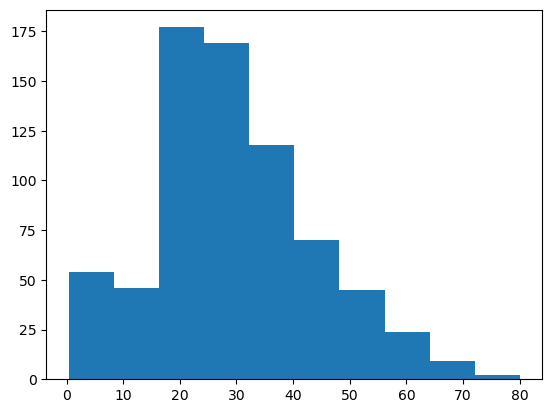

In [78]:
plt.hist(titanic['Age'])

DistPlot

C:\Users\Ashwin Kumar\AppData\Local\Temp\ipykernel_13436\3677708691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])
c:\Users\Ashwin Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

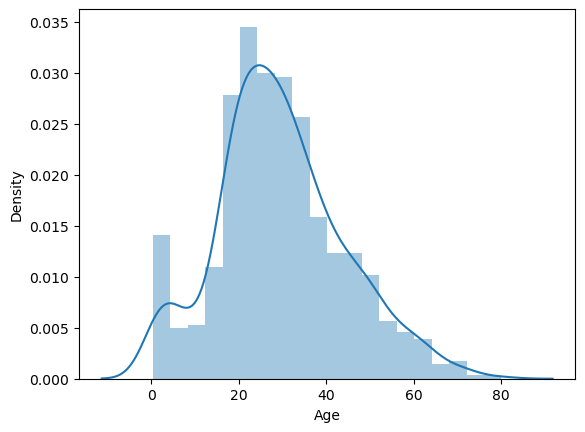

In [82]:
sns.distplot(titanic['Age'])

BoxPlot

<Axes: >

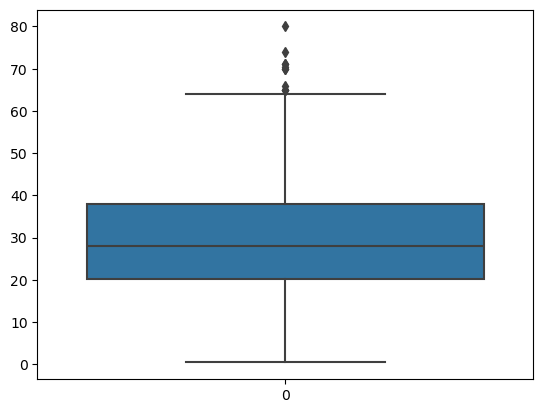

In [83]:
sns.boxplot(titanic['Age'])

# Bivariate Analysis

Definition: Analysis of two variables simultaneously to explore the relationship between them.

Purpose: To understand the association or correlation between the two variables.

Techniques:

Descriptive Statistics: Correlation coefficient, covariance, contingency tables.

Visualization: Scatter plots, line plots, bar plots, heatmaps.

Example: Analyzing the relationship between height and weight of individuals in a dataset.

X-> categorical Y-> categorical

X-> numerical   Y-> numeircal

X-> catgorical  Y-> numerical


Categorical vs. Categorical:

In [99]:
# Cross-tabulation
ct = pd.crosstab(titanic['Sex'], titanic['Survived'])

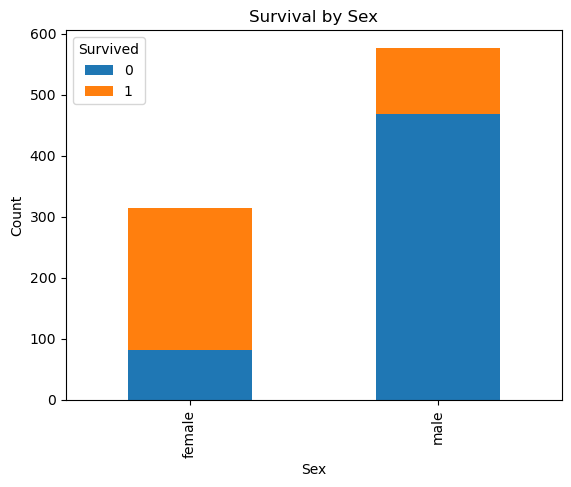

In [100]:
ct.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival by Sex')
plt.show()

Numerical vs. Numerical:


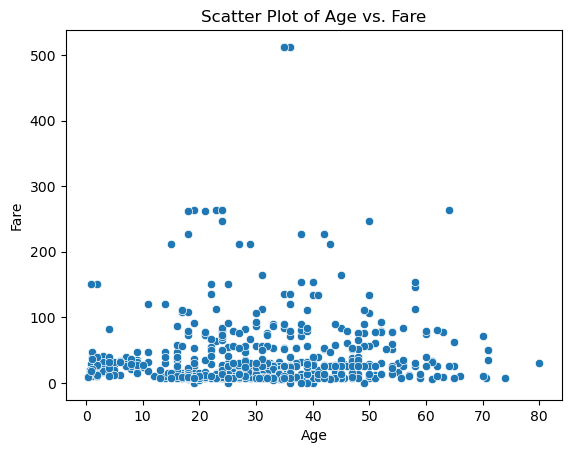

Correlation between Age and Fare: 0.09606669176903887


In [110]:
sns.scatterplot(x='Age', y='Fare', data=titanic)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs. Fare')
plt.show()

correlation = titanic['Age'].corr(titanic['Fare'])
print('Correlation between Age and Fare:', correlation)

In [108]:
titanic['Fare'].max()


512.3292

Categorical vs. Numerical:



Text(0.5, 0, 'Passenger Class')

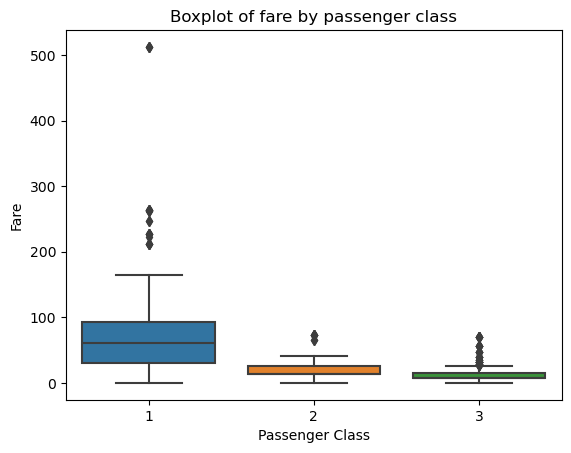

In [114]:
sns.boxplot(x='Pclass', y='Fare', data = titanic)
plt.title('Boxplot of fare by passenger class')
plt.ylabel('Fare')
plt.xlabel('Passenger Class')

# Multivariate Analysis

Definition: Analysis involving more than two variables(Columns).

Purpose: To understand the relationships between multiple variables and how they interact with each other.

Techniques:

Descriptive Statistics: Multivariate means, variances, and covariances.

Advanced Methods:

1 Regression Analysis: Multiple regression, logistic regression.

2 Factor Analysis: Principal component analysis (PCA), factor analysis.

3 Cluster Analysis: K-means clustering, hierarchical clustering.

Multivariate Analysis of Variance (MANOVA).

Visualization: Pair plots, 3D scatter plots, parallel coordinates plots.

Example: Investigating how height, weight, and age collectively influence blood pressure.

In [116]:
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
flight=sns.load_dataset("flights")


Pair Plot

c:\Users\Ashwin Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ashwin Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Ashwin Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ashwin Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of obser

Text(0.5, 1.04, 'Pair Plot Of Tips Dataset')

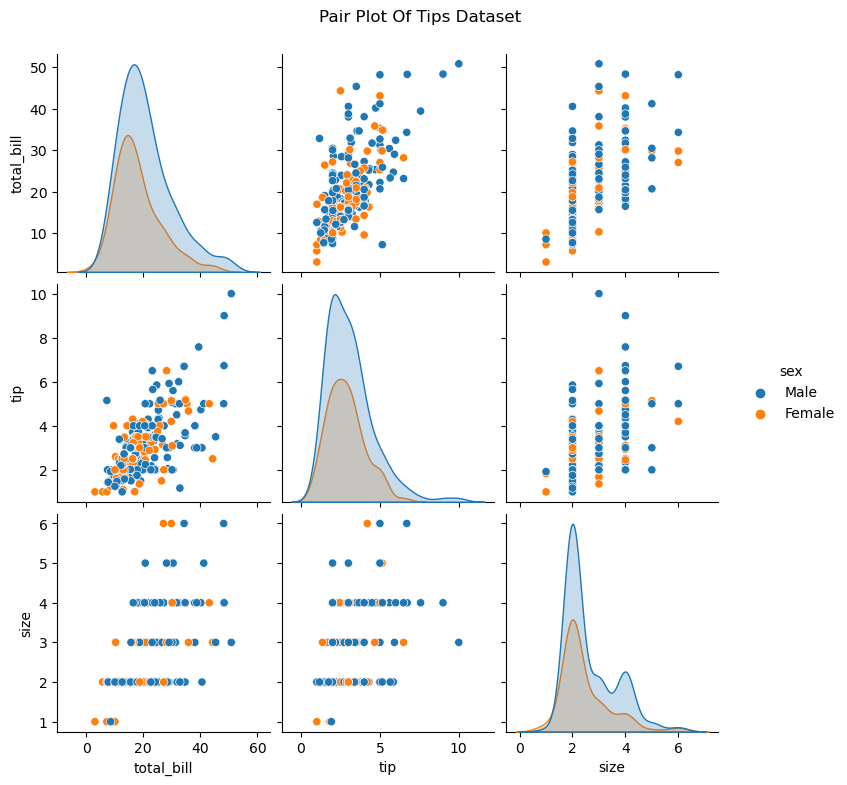

In [124]:
sns.pairplot(tips, hue='sex')
plt.suptitle('Pair Plot Of Tips Dataset', y=1.04) # here y act as a padding between title and plots

Text(0.5, 1.0, 'Scatter Plot of Total Bill vs Tip with Day and Size')

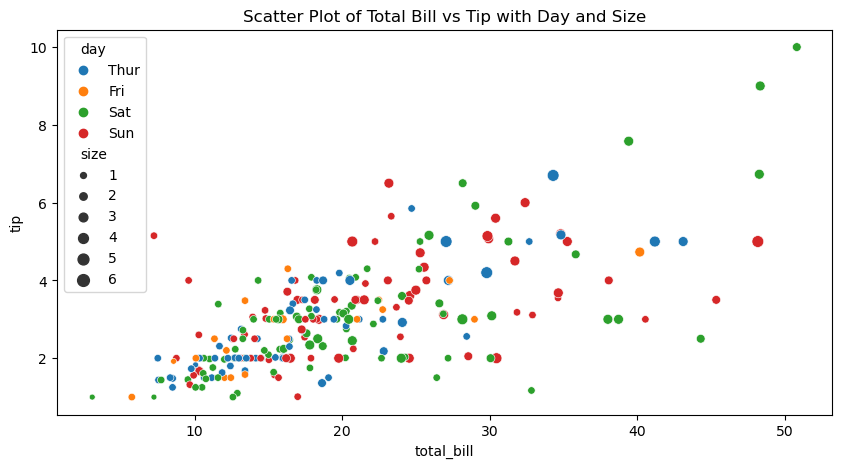

In [129]:
# Scatter plot with a third variable as color
plt.figure(figsize=(10,5))
sns.scatterplot(x='total_bill', y='tip', hue='day', size='size', data=tips)
plt.title('Scatter Plot of Total Bill vs Tip with Day and Size')

Parallel Coordinates Plot

<Axes: >

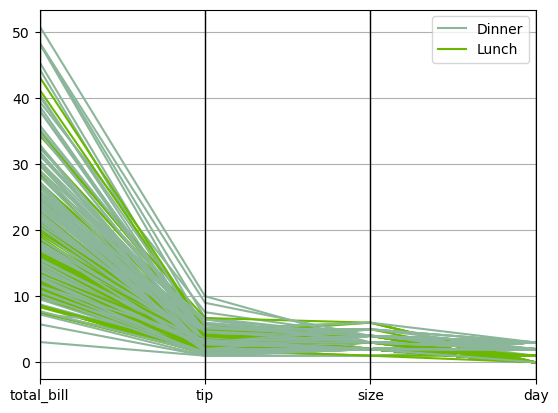

In [145]:
from pandas.plotting import parallel_coordinates

copy_tips = tips.copy()

copy_tips['day'] = copy_tips['day'].astype('category').cat.codes

parallel_coordinates(copy_tips, class_column='time', cols=['total_bill', 'tip', 'size', 'day'])